In [1]:
import plotly.express as px
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib as plt
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# correlation matrix

<AxesSubplot:>

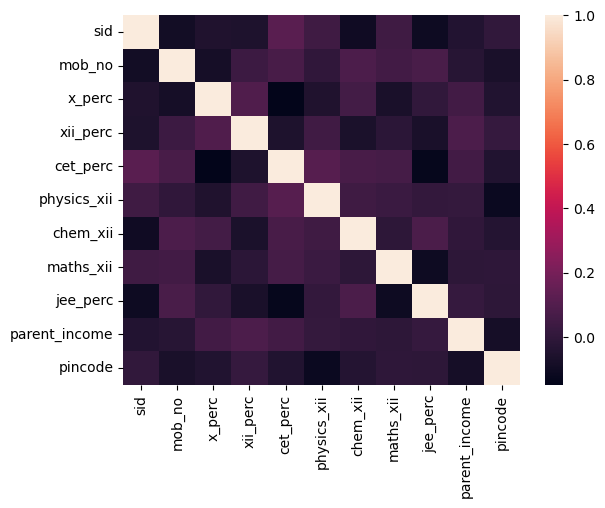

In [3]:
df =pd.read_csv("C:/Users/adity/PycharmProjects/pythonProject1/Student_dataset_2021.csv")
sns.heatmap(df.corr())

# correlation columns

In [4]:
df.corr()

,sid,mob_no,x_perc,xii_perc,cet_perc,physics_xii,chem_xii,maths_xii,jee_perc,parent_income,pincode
sid,1.000000,-0.094352,-0.053593,-0.055063,0.118487,0.041436,-0.103321,0.039958,-0.104375,-0.041678,-0.000356
mob_no,-0.094352,1.000000,-0.081917,0.034431,0.068186,-0.004577,0.081068,0.050307,0.073582,-0.028036,-0.068190
x_perc,-0.053593,-0.081917,1.000000,0.093458,-0.148652,-0.053169,0.057175,-0.069483,0.001986,0.052411,-0.046940
xii_perc,-0.055063,0.034431,0.093458,1.000000,-0.056450,0.045705,-0.065813,-0.014077,-0.069093,0.083563,0.016876
cet_perc,0.118487,0.068186,-0.148652,-0.056450,1.000000,0.107337,0.068942,0.061312,-0.132713,0.052203,-0.048002
physics_xii,0.041436,-0.004577,-0.053169,0.045705,0.107337,1.000000,0.044280,0.029544,0.006605,0.010267,-0.115702
chem_xii,-0.103321,0.081068,0.057175,-0.065813,0.068942,0.044280,1.000000,-0.010675,0.078776,-0.003944,-0.040538
maths_xii,0.039958,0.050307,-0.069483,-0.014077,0.061312,0.029544,-0.010675,1.000000,-0.106868,-0.009712,-0.007849
jee_perc,-0.104375,0.073582,0.001986,-0.069093,-0.132713,0.006605,0.078776,-0.106868,1.000000,0.015040,-0.013826
parent_income,-0.041678,-0.028036,0.052411,0.083563,0.052203,0.010267,-0.003944,-0.009712,0.015040,1.000000,-0.085525


# correlation of specific columns

In [5]:
from sklearn.model_selection import train_test_split
X=df[[ 'x_perc','xii_perc', 'cet_perc', 'physics_xii', 'chem_xii', 'maths_xii']]
Y = df['jee_perc']
X_train,X_test,Y_train,Y_test= train_test_split(X, Y, test_size=0.4,random_state=101)
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train, Y_train)
pd.DataFrame(lm.coef_,X.columns,columns=['jee percentile'])

,jee percentile
x_perc,-0.072223
xii_perc,-0.067335
cet_perc,-0.171386
physics_xii,0.072787
chem_xii,0.125055
maths_xii,-0.177422


# joint plot

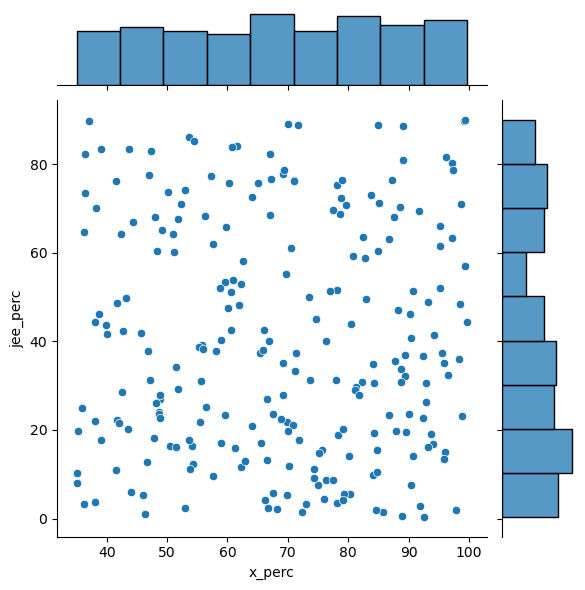

In [10]:
import seaborn as sns
sns.jointplot(data=df,x="x_perc",y="jee_perc")

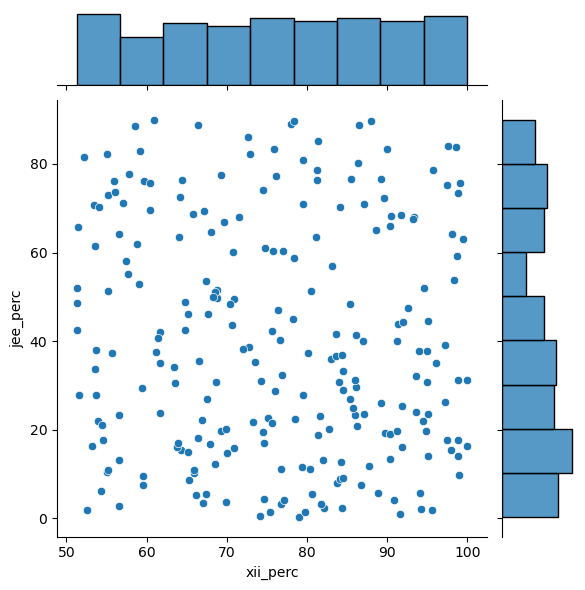

In [11]:
sns.jointplot(data=df,x="xii_perc",y="jee_perc")

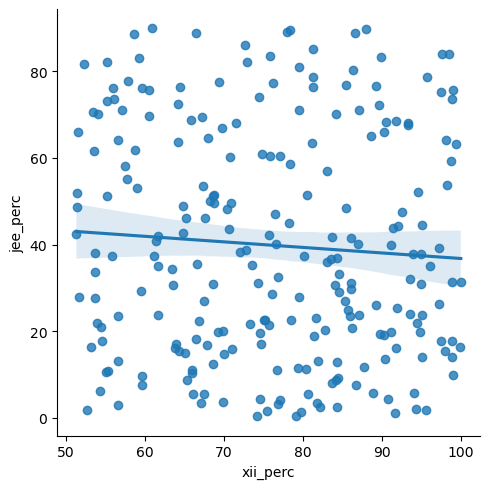

In [12]:
sns.lmplot(data=df,x='xii_perc',y='jee_perc')

# applying standard scalar 

In [15]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)


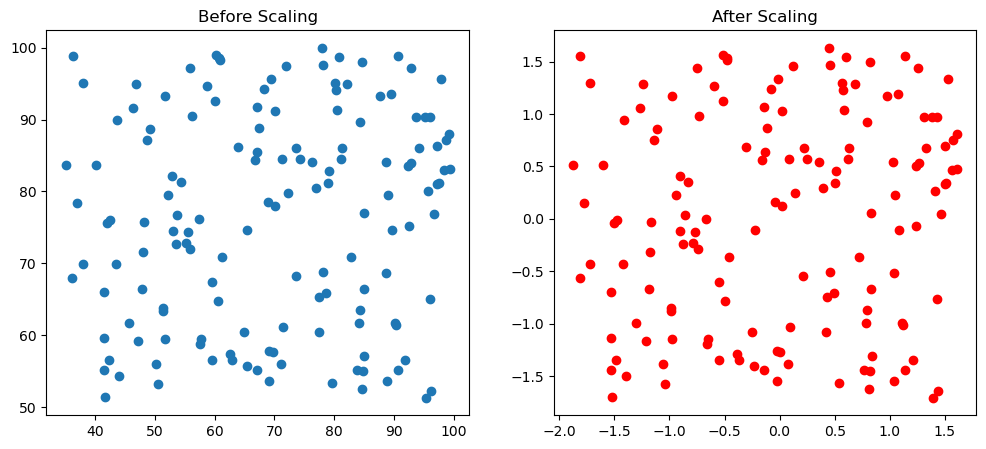

In [16]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(X_train['x_perc'], X_train['xii_perc'])
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaled['x_perc'], X_train_scaled['xii_perc'],color='red')
ax2.set_title("After Scaling")
plt.show()

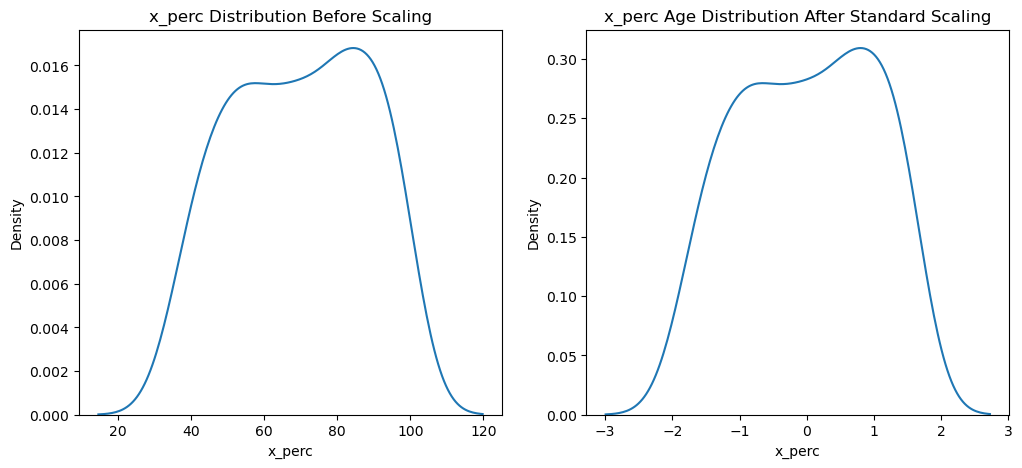

In [17]:
ig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('x_perc Distribution Before Scaling')
sns.kdeplot(X_train['x_perc'], ax=ax1)

# after scaling
ax2.set_title('x_perc Age Distribution After Standard Scaling')
sns.kdeplot(X_train_scaled['x_perc'], ax=ax2)
plt.show()

# applying log transform to convert it into normal distribution

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

# Transform X_train and X_test using log1p function
trf = FunctionTransformer(func=np.log1p)
X_train_transformed = trf.fit_transform(X_train)
X_test_transformed = trf.transform(X_test)

# Train linear regression model
reg = LinearRegression()
reg.fit(X_train_transformed, Y_train)

# Predict on test set
y_pred = reg.predict(X_test_transformed)

# Calculate mean squared error
mse = mean_squared_error(Y_test, y_pred)
print("Mean squared error:", mse)
from scipy.stats import skew

# Calculate skewness of X_train_transformed
skewness = skew(X_train_transformed)

# Print skewness
print("Skewness:", skewness)
from sklearn.preprocessing import FunctionTransformer

# Define square root function
sqrt_transform = FunctionTransformer(np.sqrt)

# Apply square root transformation to X_train_transformed
X_train_sqrt = sqrt_transform.fit_transform(X_train_transformed)

# Apply square root transformation to X_test_transformed
X_test_sqrt = sqrt_transform.transform(X_test_transformed)
skewness = skew(X_train_sqrt)

# Print skewness
print("Skewness:", skewness)

Mean squared error: 649.5958278600197
Skewness: [-0.46100752 -0.30963451 -1.57312287 -0.20161379 -0.3074409  -0.19116596]
Skewness: [-0.50729286 -0.33325674 -2.04894819 -0.22970696 -0.33751799 -0.22210335]


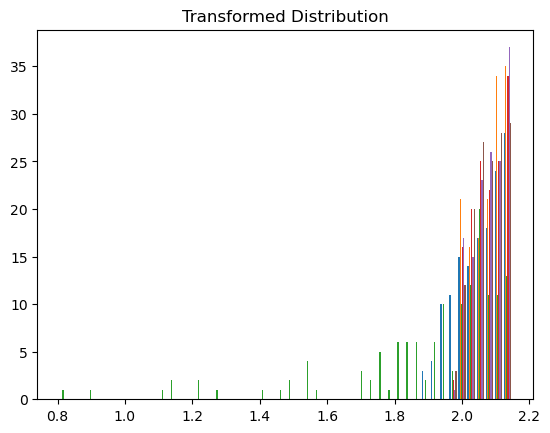

In [19]:
plt.hist(X_train_sqrt, bins=50)
plt.title('Transformed Distribution')
plt.show()

# distribution plot

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


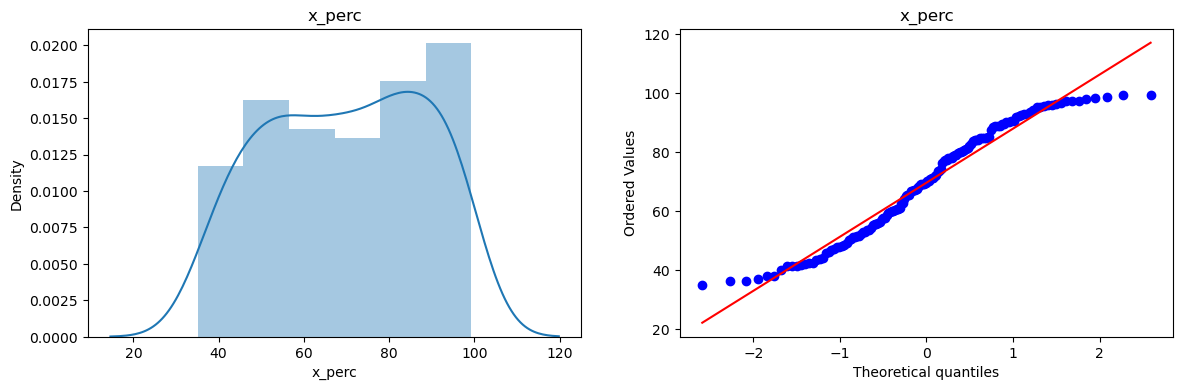

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


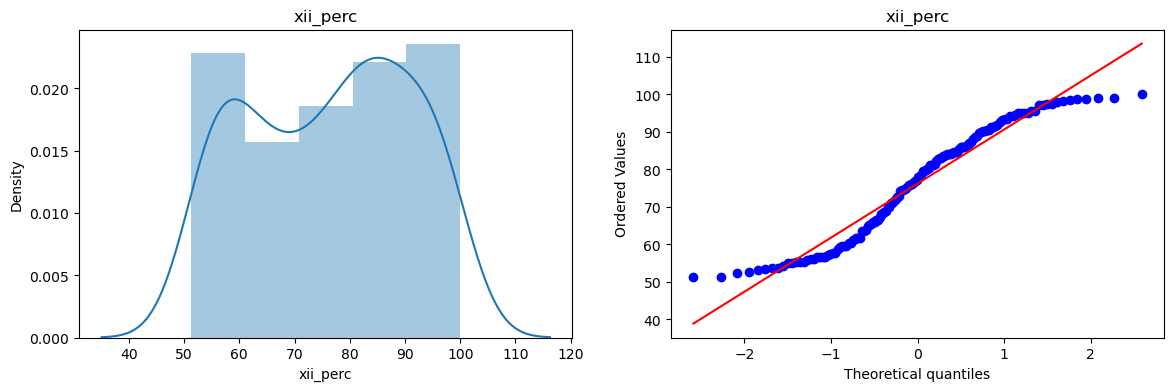

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


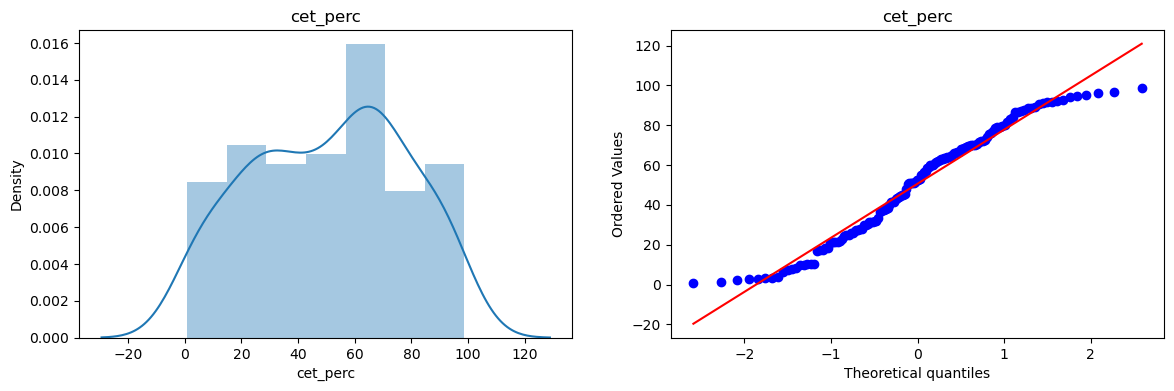

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


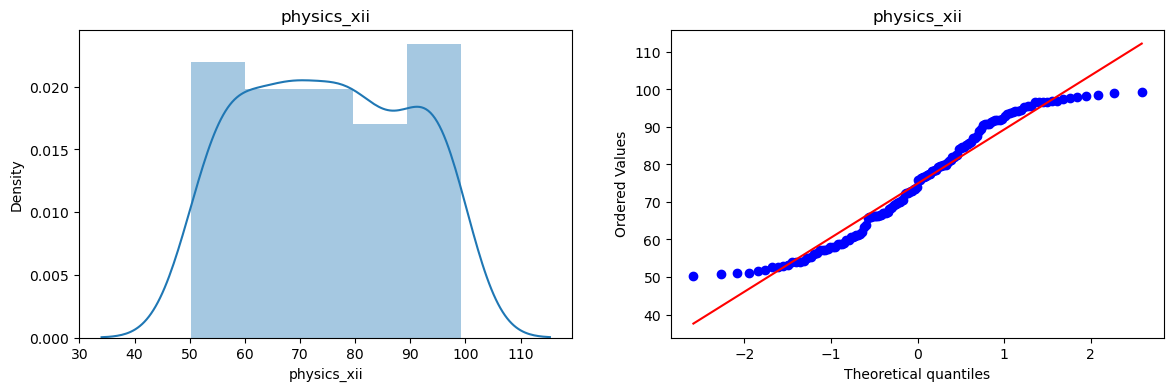

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


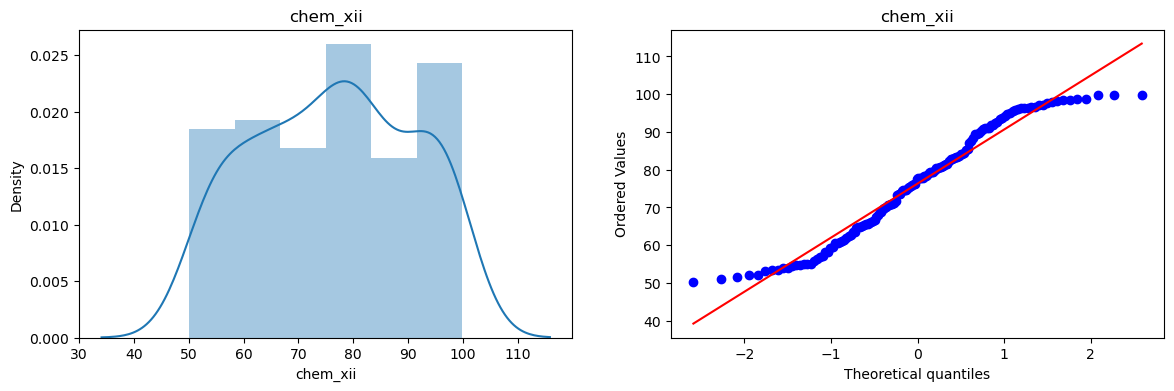

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


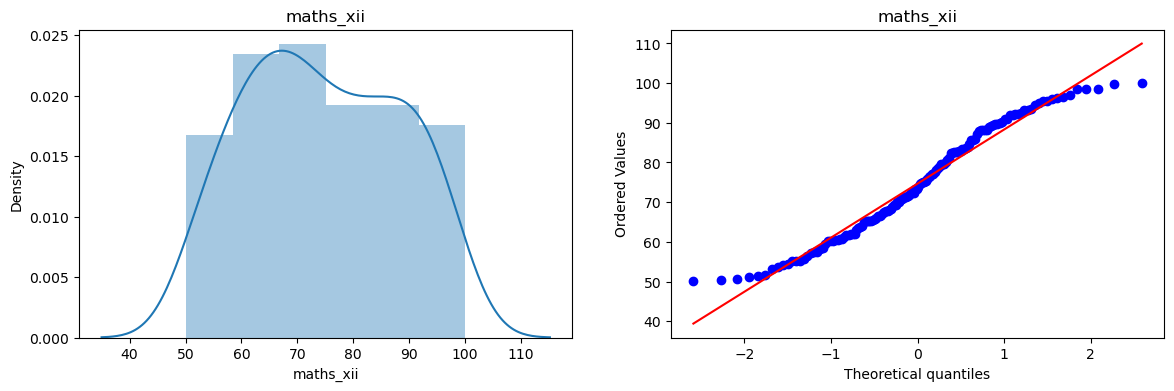

In [20]:
import scipy.stats as stats
for col in X_train.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.distplot(X_train[col])
    plt.title(col)

    plt.subplot(122)
    stats.probplot(X_train[col], dist="norm", plot=plt)
    plt.title(col)

    plt.show()

# applying box cox transformation

In [22]:
from sklearn.metrics import r2_score

from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='box-cox')

X_train_transformed = pt.fit_transform(X_train+0.000001)
X_test_transformed = pt.transform(X_test+0.000001)

pd.DataFrame({'cols':X_train.columns,'box_cox_lambdas':pt.lambdas_})

,cols,box_cox_lambdas
0,x_perc,0.982081
1,xii_perc,1.064342
2,cet_perc,0.813713
3,physics_xii,0.640901
4,chem_xii,0.938887
5,maths_xii,0.592733


In [25]:
#applying linear regression in the transformed data
X=df[[ 'x_perc','xii_perc', 'cet_perc', 'physics_xii', 'chem_xii', 'maths_xii']]
Y = df['jee_perc']
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2,random_state=42)
lr = LinearRegression()
lr.fit(X_train,y_train)

y_pred2 = lr.predict(X_test)

r2_score(y_test,y_pred2)

-0.033506870169862646

# outlier removing

In [26]:
df[['x_perc','xii_perc','cet_perc','physics_xii','chem_xii','maths_xii','jee_perc']].describe()

,x_perc,xii_perc,cet_perc,physics_xii,chem_xii,maths_xii,jee_perc
count,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000
mean,68.722958,76.180833,50.627625,74.895542,75.659583,75.123125,39.829042
std,18.618364,14.073626,27.599618,14.640747,14.295584,13.771506,26.067347
min,35.030000,51.290000,0.290000,50.180000,50.100000,50.150000,0.380000
25%,53.007500,65.040000,28.080000,61.345000,64.212500,63.407500,17.680000
50%,69.545000,76.500000,51.595000,75.065000,75.980000,75.160000,36.375000
75%,84.710000,87.302500,71.832500,87.552500,88.502500,87.265000,63.717500
max,99.700000,99.980000,99.090000,99.650000,99.850000,99.990000,89.900000


<AxesSubplot:ylabel='jee_perc'>

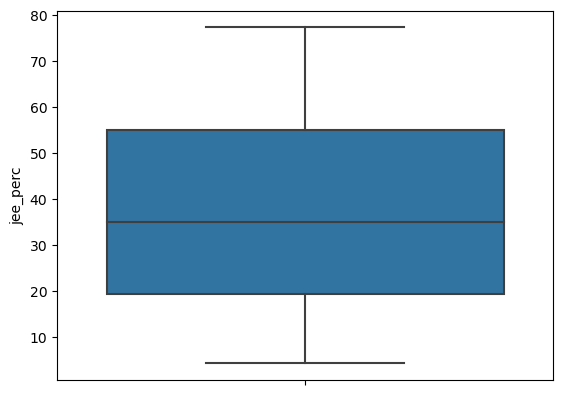

In [45]:
sns.boxplot(y='jee_perc',data=df)

In [46]:
df['jee_perc'].describe()

count    202.000000
mean      37.589208
std       21.703005
min        4.230000
25%       19.325000
50%       35.030000
75%       54.887500
max       77.290000
Name: jee_perc, dtype: float64

In [50]:
Q1=df.jee_perc.quantile(0.25)
Q3=df.jee_perc.quantile(0.75)
print(Q1,Q3)
IQR=Q3-Q1
print(IQR)

19.325 54.887499999999996
35.5625


In [53]:
lower_limit=Q1 - 1.5*IQR
upper_limit=Q3 + 1.5*IQR
print(lower_limit,upper_limit)

-34.01875 108.23124999999999


# polynomial regression

In [54]:
df =pd.read_csv("C:/Users/adity/PycharmProjects/pythonProject1/Student_dataset_2021.csv")
salaryDF = df[['x_perc','jee_perc','xii_perc', 'cet_perc', 'physics_xii', 'chem_xii', 'maths_xii']]
print(salaryDF.head())

   x_perc  jee_perc  xii_perc  cet_perc  physics_xii  chem_xii  maths_xii
0   36.39     73.54     98.89     50.86        68.40     85.48      60.12
1   93.97     16.86     67.85     31.83        72.04     82.16      86.13
2   87.76     35.44     66.54     30.34        89.97     75.89      66.88
3   40.13     41.70     83.62     65.84        61.21     97.62      65.26
4   76.32     40.09     86.95     44.06        70.96     92.85      79.48


In [55]:
X = salaryDF.iloc[:,2:]
y_train = salaryDF.iloc[:50000,1]
y_test = salaryDF.iloc[50000:,1]

rows = X.shape[0]
count = 0
N_TRAIN = 50000

train_err = {}
test_err = {}
print(rows)

     

240


In [56]:
def rmse(targets, predictions):
    return np.sqrt((np.square(predictions - targets)).mean())

In [57]:
for i in range(1,5):
  A = np.ones([rows, (3*i)+1])
  print(A.shape)
  for j in range(0,3):
    for k in range(1, i+1):
        A[:,count]=np.power(np.array(X.iloc[:,j]).T, k)
        count = count+1
  #splitting the x-values with monomials into training and testing
  print(A[1])
  x_train = A[0:N_TRAIN,:]
  x_test = A[N_TRAIN:,:]
    
  print(x_train.shape)
  w = np.linalg.inv(x_train.T.dot(x_train)).dot(x_train.T.dot(y_train))
  #calculate training error
  y_train_pred = x_train.dot(w)
  rms_train = rmse(y_train, y_train_pred)
  train_err[i] = rms_train
  print(rms_train)
    
    
  #calculate test error
  y_test_pred = x_test.dot(w)
  rms_test = rmse(y_test, y_test_pred)
  print(rms_test)
  test_err[i] = rms_test
    
  count = 0

(240, 4)
[67.85 31.83 72.04  1.  ]
(240, 4)
25.69732605336179
nan
(240, 7)
[6.7850000e+01 4.6036225e+03 3.1830000e+01 1.0131489e+03 7.2040000e+01
 5.1897616e+03 1.0000000e+00]
(240, 7)
25.583052083066097
nan
(240, 10)
[6.78500000e+01 4.60362250e+03 3.12355787e+05 3.18300000e+01
 1.01314890e+03 3.22485295e+04 7.20400000e+01 5.18976160e+03
 3.73870426e+05 1.00000000e+00]
(240, 10)
25.349846660500727
nan
(240, 13)
[6.78500000e+01 4.60362250e+03 3.12355787e+05 2.11933401e+07
 3.18300000e+01 1.01314890e+03 3.22485295e+04 1.02647069e+06
 7.20400000e+01 5.18976160e+03 3.73870426e+05 2.69336255e+07
 1.00000000e+00]
(240, 13)
25.34486355037535
nan


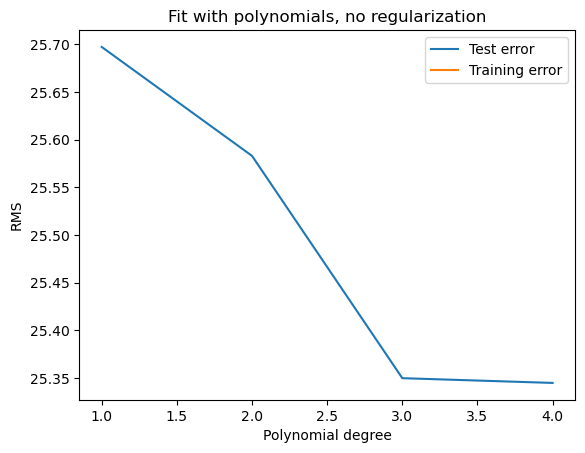

In [61]:
plt.plot(list(train_err.keys()), list(train_err.values()))
plt.plot(list(test_err.keys()), list(test_err.values()))
plt.ylabel('RMS')
plt.legend(['Test error','Training error'])
plt.title('Fit with polynomials, no regularization')
plt.xlabel('Polynomial degree')
plt.show()

In [62]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

# Select the columns of interest
X = df[['x_perc', 'xii_perc', 'cet_perc', 'physics_xii', 'chem_xii', 'maths_xii']]
y = df['jee_perc']

# Transform the input data to include polynomial terms up to degree 5
poly_features = PolynomialFeatures(degree=4, include_bias=False)
X_poly = poly_features.fit_transform(X)

# Fit a linear regression model to the transformed data
model = LinearRegression()
model.fit(X_poly, y)

# Make predictions using the trained model
y_pred = model.predict(X_poly)

# Calculate the mean squared error of the model
mse = mean_squared_error(y, y_pred)

print("Mean Squared Error:", mse)

Mean Squared Error: 57.847503073174934


In [68]:
new_data = [[0,0,0,0,0,0]]


# Transform the new data using the same polynomial features as the training data
new_data_poly = poly_features.transform(new_data)

# Use the trained model to make predictions on the new data
y_pred_new = model.predict(new_data_poly)

# Print the predicted value and the mean squared error of the model
print("Predicted value:", y_pred_new[0])
print("Mean Squared Error:", mse)

Predicted value: 6855.501840616223
Mean Squared Error: 57.847503073174934


D:\Anaconda\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


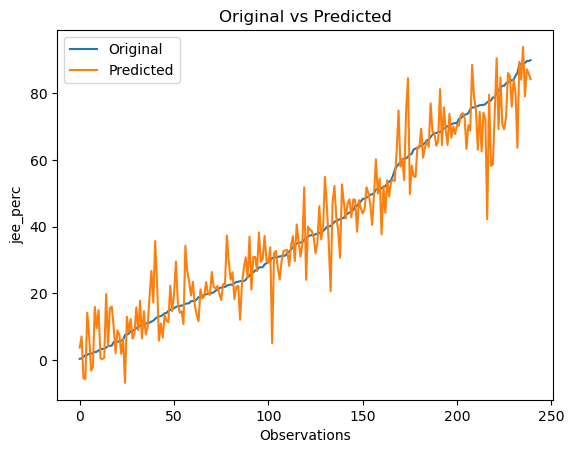

In [64]:
sort_idx = y.argsort()
y_plot = y.iloc[sort_idx].values
y_pred_plot = y_pred[sort_idx]

# Plot the original data and the predicted values
plt.plot(y_plot, label='Original')
plt.plot(y_pred_plot, label='Predicted')

# Set the plot labels and title
plt.xlabel('Observations')
plt.ylabel('jee_perc')
plt.title('Original vs Predicted')

# Show the plot legend and display the plot
plt.legend()
plt.show()